<a href="https://colab.research.google.com/github/jamalromero/colab/blob/main/3_3_Shallow_Network_Regions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keep Python runtime and install java

# Understanding Deep Learning [book](https://udlbook.github.io/udlbook/)
## **Notebook 3.3 -- Shallow network regions**
The purpose of this notebook is to compute the maximum possible number of linear regions as seen in figure 3.9 of the book.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [ ]:
%load /content/drive/MyDrive/colab/init_script.ipynb

In [ ]:
NDManager manager = NDManager.newBaseManager();

The number of regions $N$ created by a shallow neural network with $D_i$ inputs and $D$ hidden units is given by Zaslavsky's formula:

\begin{equation}N = \sum_{j=0}^{D_{i}}\binom{D}{j}=\sum_{j=0}^{D_{i}} \frac{D!}{(D-j)!j!} \end{equation} <br>



In [335]:
long numberOfRegions(int numInputs, int numHiddenUnits) {
  if (numHiddenUnits < numInputs) {
      return (long) Math.pow(2, numHiddenUnits);
  }
  return LongStream.rangeClosed(0, numInputs).map(i -> CombinatoricsUtils.binomialCoefficient(numHiddenUnits, (int)i)).sum();
}

In [470]:
// Calculate the number of regions for 2 inputs and 3 hidden units
var numInputs = 2;
var numHiddenUnits = 3;
var n = numberOfRegions(numInputs, numHiddenUnits);
System.out.printf("Number of inputs = %s, number of hidden units = %s, Number of regions = %d", numInputs, numHiddenUnits, n);

Number of inputs = 2, number of hidden units = 3, Number of regions = 7

java.io.PrintStream@40c1446d

In [249]:
// Calculate the number of regions for 10 inputs and 50 hidden units
var numInputs = 10;
var numHiddenUnits = 50;
var n = numberOfRegions(numInputs, numHiddenUnits);
System.out.printf("Number of inputs = %s, number of hidden units = %s, Number of regions = %d", numInputs, numHiddenUnits, n);

Number of inputs = 10, number of hidden units = 50, Number of regions = 13432735556

java.io.PrintStream@40c1446d

Now let's plot the graph from figure 3.9a and 3.9b




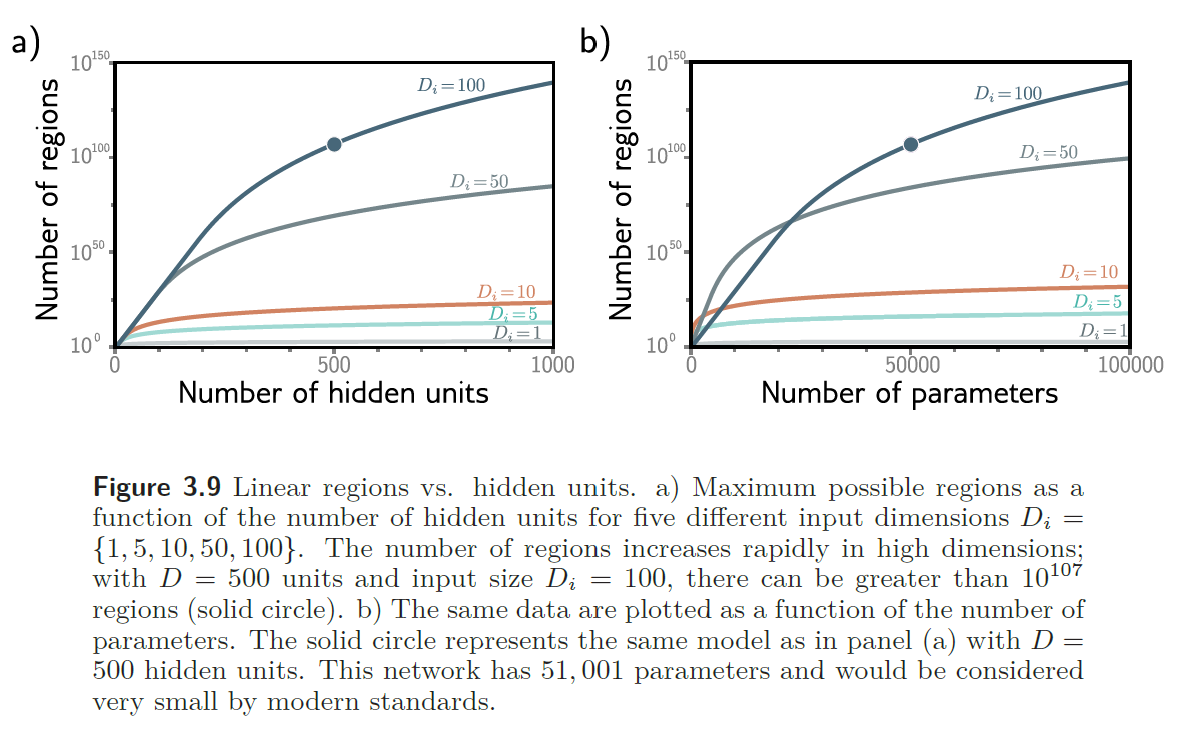

**Calculation of regions may cause integer overflow. So instead, we'll calculate the log of the number of regions. Here's an explanation**:

$log(A + B + C)=log \left(𝐴⋅(1 + \frac{𝐵}{𝐴} + \frac{C}{𝐴}) \right)$

$log(A + B + C)=log \left(𝐴⋅(1 + \frac{𝐵}{𝐴} + \frac{C}{𝐴}) \right) = log(A) + log(1 + \frac{B}{A} + \frac{C}{A})$

Using the properties of logarithms: To compute the logarithm of a sum efficiently, consider:

$log(A+B+C)=log(A)+log \left(1+e^{log⁡(𝐵)−log(𝐴)}+e^{log(𝐶)−log(𝐴)} \right)$

Compute using the maximum logarithm: Choose $M = max(log(A), log(B), log(C))$. Then:

$log(A+B+C)=M+log \left(e^{log⁡(𝐴)−𝑀}+e^{log⁡(𝐵)−𝑀}+e^{log⁡(𝐶)−𝑀} \right)$

This formula effectively shifts the terms so that we avoid working with extremely large exponents directly, thereby minimizing the risk of overflow in computations.

Let $A$, $B$ and $C$ be large numbers where the sum may cause overflow.

Compute $M = max(log(A), log(B), log(C))$

Calculate the terms: $x = e^{log(A) - M}, y = e^{log(B) - M}, z = e^{log(C) - M}$

Compute: $log(A + B + C) = M + log(x + y + z)$.

In [382]:
double numberOfRegionsLog(int numInputs, int numHiddenUnits) {
  if (numHiddenUnits < numInputs) {
      return Math.log(Math.pow(2, numHiddenUnits));
  }
  double[] ans =  IntStream.rangeClosed(0, numInputs).mapToDouble(i -> CombinatoricsUtils.binomialCoefficientLog(numHiddenUnits, i)).toArray();
  double max = Arrays.stream(ans).max().getAsDouble();
  double max_exp = Arrays.stream(ans).map(i -> Math.exp(i - max)).sum();
  return max + Math.log(max_exp);
}

In [409]:
var max_hidden_units = 1000;
var one_input = IntStream.rangeClosed(1, max_hidden_units).mapToDouble(i -> numberOfRegionsLog(1, i)).toArray();
var five_input = IntStream.rangeClosed(1, max_hidden_units).mapToDouble(i -> numberOfRegionsLog(5, i)).toArray();
var ten_input = IntStream.rangeClosed(1, max_hidden_units).mapToDouble(i -> numberOfRegionsLog(10, i)).toArray();
var fifty_input = IntStream.rangeClosed(1, max_hidden_units).mapToDouble(i -> numberOfRegionsLog(50, i)).toArray();
var hundred_input = IntStream.rangeClosed(1, max_hidden_units).mapToDouble(i -> numberOfRegionsLog(100, i)).toArray();

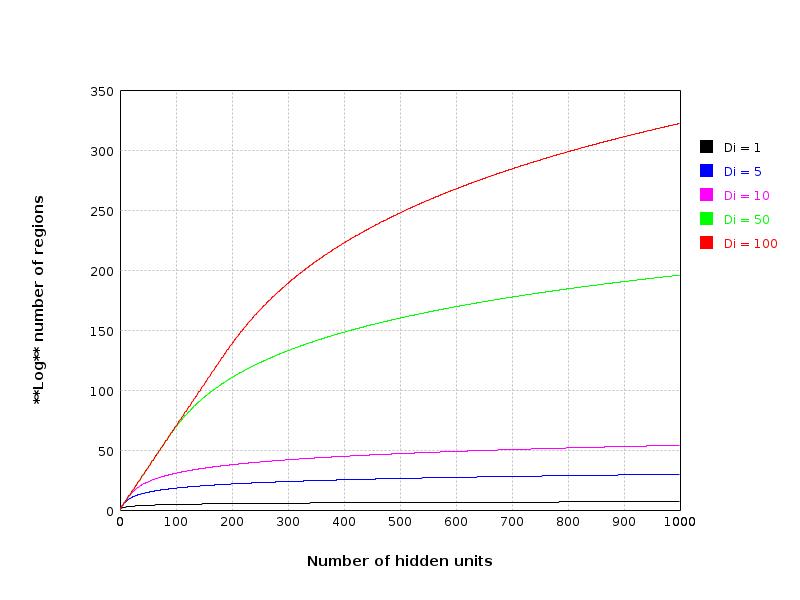

In [481]:
var x = IntStream.rangeClosed(1,max_hidden_units).asDoubleStream().toArray();
var canvas = LinePlot.of(one_input, Line.Style.SOLID, Color.BLACK, "Di = 1").canvas();
canvas.add(LinePlot.of(five_input, Line.Style.SOLID, Color.BLUE, "Di = 5"));
canvas.add(LinePlot.of(ten_input, Line.Style.SOLID, Color.MAGENTA, "Di = 10"));
canvas.add(LinePlot.of(fifty_input, Line.Style.SOLID, Color.GREEN, "Di = 50"));
canvas.add(LinePlot.of(hundred_input, Line.Style.SOLID, Color.RED, "Di = 100"));
canvas.setAxisLabels("Number of hidden units", "**Log** number of regions");
canvas.toBufferedImage(800, 600);